In [1]:
pip install xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
model_data = pd.read_csv("../../Important Data/optimized_model_data.csv",header=[0,1,2],index_col=[0])

In [5]:
model_data.columns = pd.MultiIndex.from_tuples([('','','genre_top')]+model_data.columns.to_list()[1:])

In [7]:

model_data.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [9]:
dictGenre = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [41]:
X = model_data.drop([('','','genre_top')],axis=1)
y = model_data['','','genre_top'].replace(dictGenre)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_14833/1149637687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = model_data['','','genre_top'].replace(dictGenre)


In [43]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [45]:
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Now create sample weights
sample_weights = np.array([class_weights[label] for label in y_train])

In [47]:
model = XGBClassifier(subsample= 0.8, reg_alpha=2.0,reg_lambda=2.0, gamma=2.0, n_estimators= 1500,min_child_weight=5, max_depth= 4, learning_rate= 0.02, colsample_bytree= 0.7,eval_metric='mlogloss',use_label_encoder=False, verbosity=1)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [49]:
model.fit(x_train,y_train,sample_weight=sample_weights,eval_set=[(x_train, y_train),(x_val, y_val)],verbose=True,early_stopping_rounds=25)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.59418	validation_1-mlogloss:1.59493
[1]	validation_0-mlogloss:1.57957	validation_1-mlogloss:1.58110
[2]	validation_0-mlogloss:1.56544	validation_1-mlogloss:1.56773
[3]	validation_0-mlogloss:1.55155	validation_1-mlogloss:1.55467
[4]	validation_0-mlogloss:1.53819	validation_1-mlogloss:1.54207
[5]	validation_0-mlogloss:1.52513	validation_1-mlogloss:1.52953
[6]	validation_0-mlogloss:1.51232	validation_1-mlogloss:1.51725
[7]	validation_0-mlogloss:1.49997	validation_1-mlogloss:1.50566
[8]	validation_0-mlogloss:1.48785	validation_1-mlogloss:1.49407
[9]	validation_0-mlogloss:1.47616	validation_1-mlogloss:1.48330
[10]	validation_0-mlogloss:1.46456	validation_1-mlogloss:1.47229
[11]	validation_0-mlogloss:1.45326	validation_1-mlogloss:1.46169
[12]	validation_0-mlogloss:1.44227	validation_1-mlogloss:1.45130
[13]	validation_0-mlogloss:1.43163	validation_1-mlogloss:1.44139
[14]	validation_0-mlogloss:1.42091	validation_1-mlogloss:1.43128
[15]	validation_0-mlogloss:1.41075	

KeyboardInterrupt: 

In [21]:
y_pred_train = model.predict(x_train)

NameError: name 'model' is not defined

In [23]:
print(classification_report(y_pred_train,y_train))

NameError: name 'classification_report' is not defined

In [25]:
y_pred_val = model.predict(x_val)

NameError: name 'model' is not defined

In [27]:
print(classification_report(y_pred_val,y_val))

NameError: name 'classification_report' is not defined

In [22]:
y_pred = model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2142
           1       0.81      0.81      0.81      1382
           2       0.38      0.41      0.39       363
           3       0.76      0.83      0.79       532
           4       0.62      0.76      0.68       417

    accuracy                           0.78      4836
   macro avg       0.69      0.73      0.71      4836
weighted avg       0.79      0.78      0.79      4836



In [24]:
evals_result = model.evals_result()

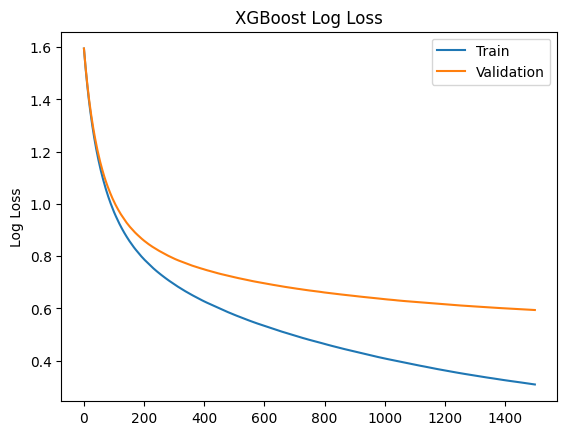

In [25]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

In [26]:
optimized_data_prob = model.predict_proba(X)

In [27]:
optimized_data_prob_final = pd.DataFrame(optimized_data_prob,index=X.index,columns=["Rock","Electronic","Pop","Hip-Hop","Folk"])

In [28]:
optimized_data_prob_final.to_csv("optimized_data_prob_final.csv")

In [46]:
import pickle
with open('final_optimized_classification_model.pkl', 'rb') as file:
        model = pickle.load(file)

In [48]:
bank_acc = pd.read_csv("bank_acc.csv",index_col=[0],header=[0,1,2])

In [50]:
bank_acc

chroma_cens                                                              \
     kurtosis                                                               
           01        02        03        04        05        06        07   
0   -0.273852  0.846372 -1.267982 -1.048105  0.467149  0.312335  3.789103   

                                 ...  mel_spec                               \
                                 ...       std                                
         08        09        10  ...        90        91       92        93   
0 -0.397305  1.204172  6.673942  ...  0.002722  0.003452  0.00214  0.001427   

                                                              
                                                              
         94       95        96        97        98        99  
0  0.000163  0.00001  0.000008  0.000008  0.000008  0.000008  

[1 rows x 1414 columns]

In [52]:
bank_acc_prob = model.predict_proba(bank_acc)

In [ ]:
bank_acc_prob = model.predict_proba(bank_acc)


In [38]:
pd.DataFrame(bank_acc_prob).to_csv("bank_acc_prob.csv")